# Quiz Machine Learning Course Politeknik Negeri Malang
*Kelompok 4*

# Core

## Library Area

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## X, y Splitter and Fetch Data

In [2]:
X, y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## X, y type fixer

In [3]:
scaler = MinMaxScaler()
X = np.array(X)
y = y.astype(int)

X = scaler.fit_transform(X)

## Pengujian Keseimbangan Data

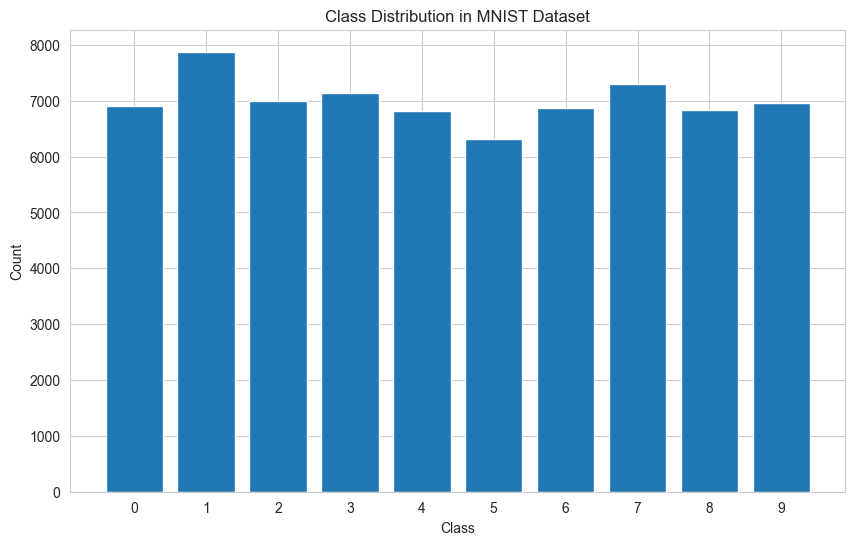

In [4]:
class_distribution = np.bincount(y)

plt.figure(figsize=(10, 6))
plt.bar(range(10), class_distribution, tick_label=range(10))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

### Perhitungan Ketidakseimbangan Data

Data yang tidak seimbang dapat dihitung menggunakan rumus koefisien variasi (CV) menggunakan rumus

CV = s / x

Perhitungan koefisien variasi bisa kita lihat dari standard deviasi yang dibagi dengan rata-rata data, ini untuk melihat distribusi data tersebut

In [5]:
s = np.std(class_distribution)
x = np.mean(class_distribution)

cv = (s/x) * 100
print(f"{cv}%")

5.41177476641896%


Terlihat bahwa koefisien variasi adalah 5%, ini menunjukkan bahwa distribusi variasi dari angka termasuk sangat kecil

## Menampilkan 15 Citra

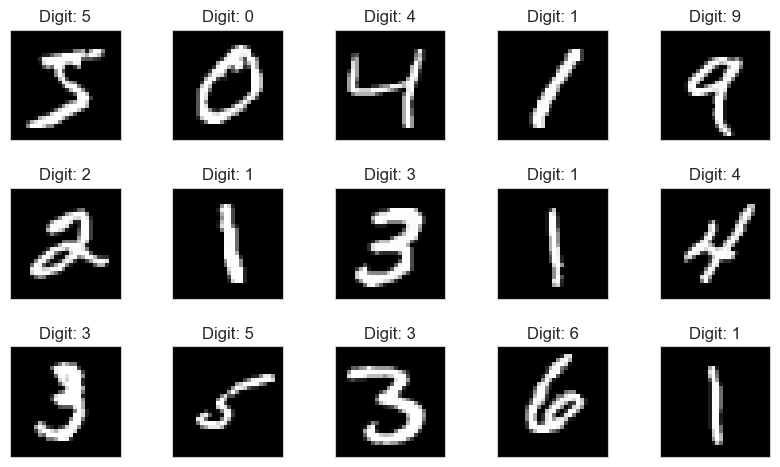

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(X[i].reshape(28, 28), cmap = 'gray', interpolation=None)
    plt.title("Digit: {}".format(y[i]))
    plt.xticks([])
    plt.yticks([])

# Support Vector Machine

## SVM Modelling dengan PCA

In [7]:
n = 60
pca = PCA(n_components = n)
X_pca = pca.fit_transform(X)

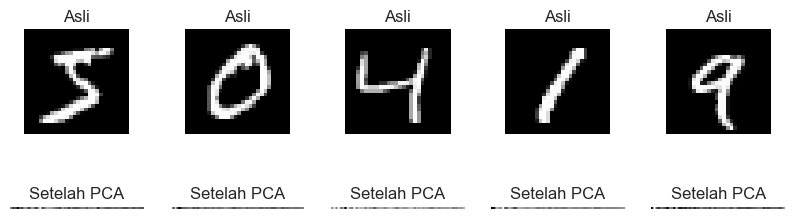

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 3))

for i in range(5):
    axes[0, i].imshow(X[i].reshape(28, 28), cmap=plt.cm.gray)
    axes[0, i].set_title("Asli")
    axes[0, i].axis('off')

    axes[1, i].imshow(X_pca[i].reshape(-1, n), cmap=plt.cm.gray)
    axes[1, i].set_title("Setelah PCA")
    axes[1, i].axis('off')

plt.show()

In [9]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_pca, y, test_size=0.3, stratify=y, random_state=30)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=30)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_pca, y, test_size=0.1, stratify=y, random_state=30)

X_np_train_30, X_np_test_30, y_np_train_30, y_np_test_30 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=30)
X_np_train_20, X_np_test_20, y_np_train_20, y_np_test_20 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=30)
X_np_train_10, X_np_test_10, y_np_train_10, y_np_test_10 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=30)

In [10]:
def plot_image_with_prediction(image, true_label, predicted_label):
    plt.imshow(image.reshape(28, 28), cmap='gray', interpolation=None)
    title_color = 'black' if true_label == predicted_label else 'red'
    plt.title("True: {} | Predicted: {}".format(true_label, predicted_label), color=title_color)
    plt.xticks([])
    plt.yticks([])

### Split Data 70 and 30

In [11]:
from sklearn.model_selection import GridSearchCV
model = SVC()
param_grid = {'C': [1],
              'gamma': [0.001]}
grid = GridSearchCV(model, param_grid)
grid.fit(X_train_30, y_train_30)

GridSearchCV(estimator=SVC(), param_grid={'C': [1], 'gamma': [0.001]})

In [12]:
model = grid.best_estimator_
y_pred = model.predict(X_test_30)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test_30, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2071
           1       0.94      0.98      0.96      2363
           2       0.93      0.91      0.92      2097
           3       0.92      0.90      0.91      2142
           4       0.91      0.94      0.93      2047
           5       0.90      0.89      0.90      1894
           6       0.95      0.97      0.96      2063
           7       0.94      0.93      0.94      2188
           8       0.92      0.89      0.90      2048
           9       0.91      0.89      0.90      2087

    accuracy                           0.93     21000
   macro avg       0.93      0.93      0.93     21000
weighted avg       0.93      0.93      0.93     21000


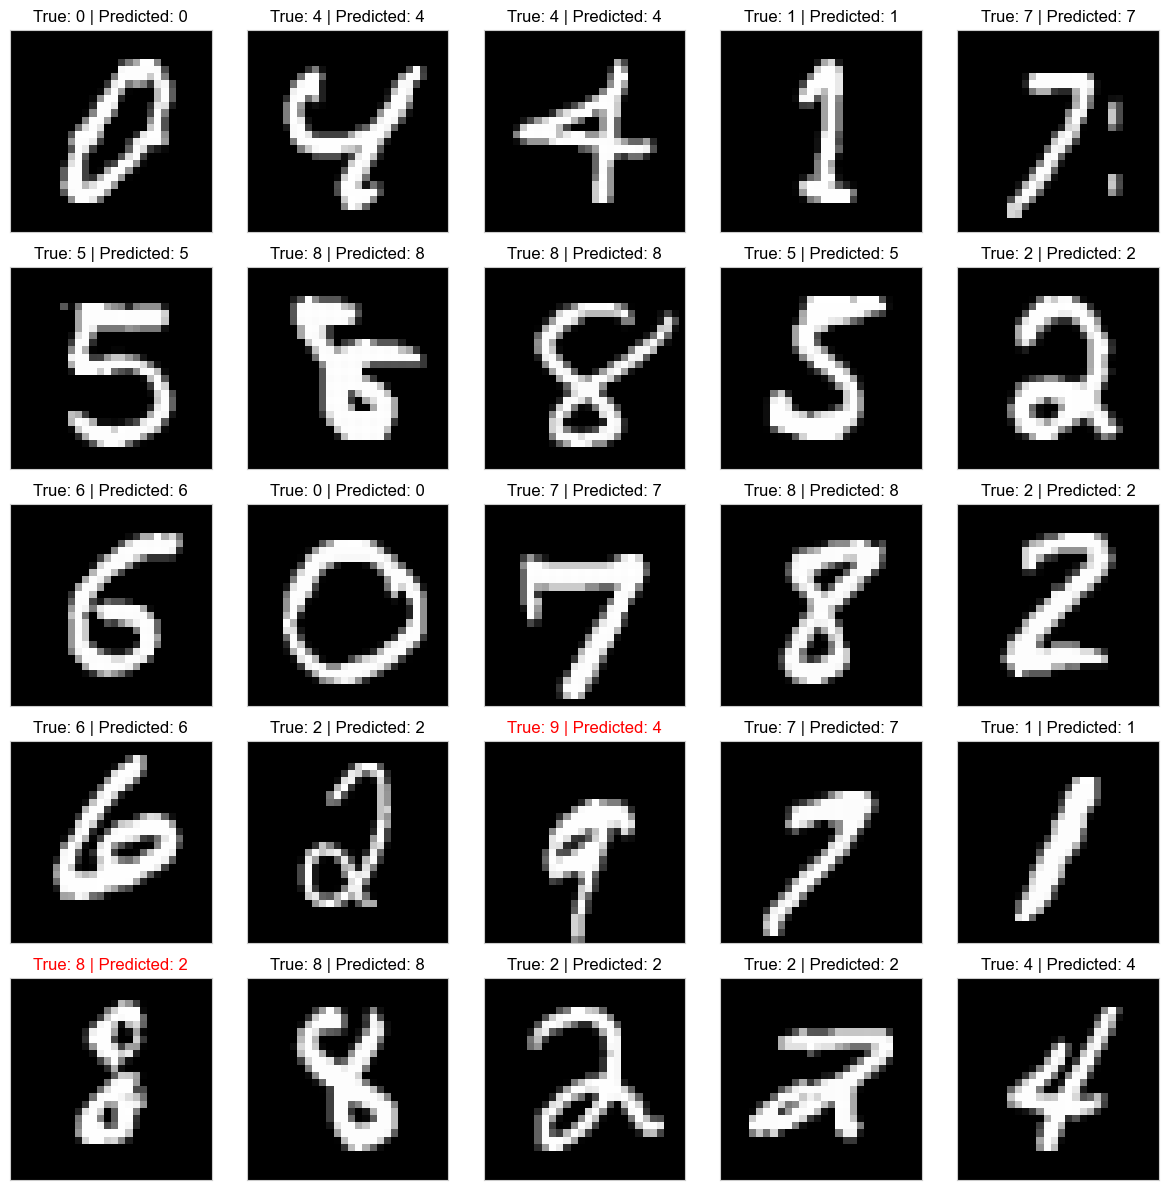

In [14]:
plt.figure(figsize=(12, 12))  
for i in range(25):
    index = np.random.randint(0, len(X_test_30)) 
    pred_label = y_pred[index]
    true_label = y_test_30[index]
    
    original_image = X_np_test_30[index]
    plt.subplot(5, 5, i + 1)  
    plot_image_with_prediction(original_image, true_label, pred_label)

plt.tight_layout()
plt.show()

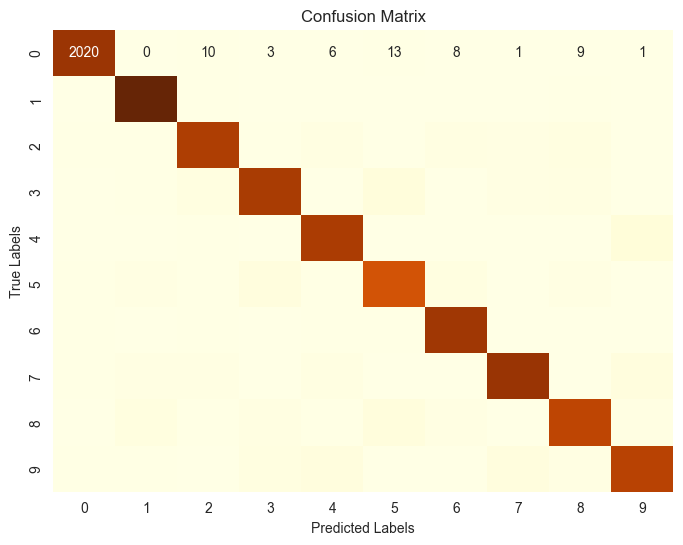

In [17]:
cm = confusion_matrix(y_test_30, y_pred)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, cmap='YlOrBr', annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()